<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class19_TimeSeries_AirPassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CST3512 Class 19    
**Time Series Analysis**    
**Airline Passenger Data**    
    
*reference: [NIST Engineering Statistics Handbook 6.4.4.2](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm)*
    
*Examples in this notebook are from a [blog entry, Medium article](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000), and [GitHub repos](https://github.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-) entitled 'Time Series ARIMA' by Jacob Stallone, on November 9, 2019.*     

Data is courtesy of [Jacob Stallone's copy](https://github.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-/blob/master/AirPassengers.csv) of an [original Kaggle source](https://www.kaggle.com/datasets/chirag19/air-passengers).    


<center><i>This notebook is available at https://bit.ly/cst3512cl19</i></center>    
    

versions: Spring 2021 by Professor Elena Filatova; Nov-2021 by Professor Patrick; updated: Mar-2023.     



    





---



**Time Series Forecast : A basic introduction using Python**    



Time series data is an important source for information and strategy used in various businesses. From a conventional finance industry to education industry, they play a major role in understanding a lot of details on specific factors with respect to time. I recently learnt the importance of Time series data in the telecommunication industry and wanted to brush up on my time series analysis and forecasting information. 


This notebook works through a simple example using Python.    


Time series forecasting is basically the machine learning modeling for Time Series data (years, days, hour, etc.) for predicting future values using Time Series modeling. This approach helps if your data in serially correlated.  





---



##Housekeeping: Import Modules, etc.

In [8]:
import pandas as pd
import numpy as np    

from datetime import datetime

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


https://matplotlib.org/users/customizing.html

The dataset is from kaggle , Let's explore it using a copy that Jacob Stallone posts on his GitHub.   Pull that file into the current working directory with `!curl` as follows.    


In [ ]:
!curl "https://raw.githubusercontent.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-/master/AirPassengers.csv"  -o AirPassengers.csv

###Read the dataset into a Pandas dataframe called `data`.

In [ ]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)



---



##Dataset Description 

The data contains a particular month and number of passengers travelling in that month. The data type here is object (month).     

Convert it into a Time series object and use the Month column as the index.    




Timestamps are useful objects for comparisons.     

Create a timestamp object with the `pd.to_datetime()` function and a string specifying the date. These timestamps are useful for logical filtering with dates.

In [ ]:
# from datetime import datetime

con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

In [ ]:
data.head(5)

In [ ]:
data.tail(5)

The data type is `datetime64[ns]`. For this notebook example it is read into a series rather than a dataframe but the approach works regardless of whether the data is in a series or a dataframe.   

In [ ]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

###Explore properties of the date-time based index

In [ ]:
#1. Specify the index as a string constant:
ts['1949-01-01']

In [ ]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

In [ ]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

In [ ]:
#2. Use ':' if one of the indices is at an end
ts[:'1949-05-01']

In [ ]:
#All rows of 1962:
ts['1949']



---



##**Stationarity**    




**Stationarity** testing is a crucial concept in time-series analysis that helps us determine whether a `time-series` data set exhibits consistent patterns over time. `Time-series` data is simply a sequence of data points collected or recorded at regular intervals, such as daily stock prices or monthly sales figures. In data science, understanding the properties of `time-series` data is vital because it impacts the quality and accuracy of our predictions and analyses.    

###Characteristics of **Stationarity**    


**Stationarity** is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series.     

There are a lot of statistical theories to explore stationary series than non-stationary series.  In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:
* constant **mean**
* constant **variance**
* an **auto-co-variance** that does not depend on time       
    
A `time-series` data set is considered stationary if its statistical properties, such as:
*  `mean` (average)    
*  `variance` (spread)    
*  `autocorrelation` (relationship between data points at different time lags)    
, remain constant over time. In simple terms, this means that the overall pattern of the data does not change as time progresses. Stationary `time-series` data is desirable because it simplifies modeling and forecasting, allowing us to make more accurate predictions.    

The characteristics of **Stationarity** can be easily tested using statistical techniques in Python.    
    
An excellent way to understand you stationarity in a `Time Series` is by visually inspecting the plot.    



*Some additional housekeeping to import plot converters*    

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.show()

It’s clear from the plot that there is an overall increase in the trend and with some seasonality in it.



---



###Stationarity Testing 

Stationarity testing involves performing statistical tests on the `time-series` data to check for the presence or absence of stationarity. Some of the popular tests include:
* **<font color=blue>[Augmented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)</font>** (ADF) test    
* **[Kwiatkowski-Phillips-Schmidt-Shin](https://en.wikipedia.org/wiki/KPSS_test)** (KPSS) test    
* **[Phillips-Perron](https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test)** (PP) test    
    
These tests compare specific properties of the data against a null hypothesis, which is a statement that assumes no stationarity. If the test results suggest that we can reject the null hypothesis, it means that the data is likely to be stationary.    




In the [blog entry, Medium article](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000) '**Time Series ARIMA**', Jacob Stallone has provided a function for testing **stationarity** which will be used often in this Time Series notebook. Some of the concepts utilized by Stallone include:    

* **Plotting Rolling Statistics** - The function will plot the moving mean or moving Standard Deviation. This is still a visual method.     

    *NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months.*

* **<font color=blue>Dickey-Fuller Test</font>** - This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary.    

    *More details for <b><font color=blue>Dickey-Fuller Test</font></b>.*

    Function details:

  * **mean**    
  * **Standard Deviation** (instead of variance)    
  * **Plot Original Series**     
  * **Plot Mean**     
  * **Plot std**    
  * **Plot Dickey-Fuller Test**    


####<u>`.test_stationarity()`</u>     
    
A function to analyze a `time series` and test **stationarity**

*Additional housekeeping to import `adfuller` from `statsmodels` to test stationarity*

In [ ]:
from statsmodels.tsa.stattools import adfuller

*Based on the deprecation warning in the execution of the last snippet, the following import or some derivative thereof may warrant exection.*

In [ ]:
# No need to run this import if no deprecation warning on last snippet
import pandas.util.testing as tm

Create a function `test_stationarity()` to perform various tests of stationarity as described above:    

* **mean**    
* **Standard Deviation** (instead of variance)    
* **Plot Original Series**     
* **Plot Mean**     
* **Plot std**    
* **Plot Dickey-Fuller Test**    


In [18]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')

    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

Plot the tests of stationarity for the time series `ts` by parsing the time series data into the new `test_stationarity()` function.


In [ ]:
plt.figure(figsize=(20,10))
test_stationarity(ts)
plt.show()



This series is not **stationary** because:    

* **mean** is increasing even though the **std** is small.
* **Test Stat** is > critical value.


*Note: the signed values are compared and the absolute values.*    



####`.test_adf()`      

A function to invoke the <font color=blue><b>**Augmented Dickie Fuller (ADF) Test**</font> analysis of a series and test of **stationarity**    

In [39]:
def adf_test(arg_series):
    result = adfuller(arg_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]['5%']:
        print('\nThe time series is stationary.')
        return(True)
    else:
        print('\nThe time series is non-stationary.')
        return(None)

In [ ]:
adf_test(ts)

**Stationarity testing** is an essential step in `time-series` analysis that helps us determine if the data exhibits consistent patterns over time. By ensuring stationarity, we can build more accurate and reliable models for prediction and analysis. As data science students, understanding the concept of stationarity and its importance will help you better approach `time-series` data in your projects and research.    




---



###Transformation Techniques for Times Series Stationarity    

Before we continue, let's read a copy of the data into a new `data` Dataframe.

In [60]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', 
                   header=0, index_col=0, parse_dates=True).squeeze("columns")

In many cases, `time-series` data may not be stationary, but it can be transformed to achieve stationarity. This can be often be done through one or more of the following processes:    

1. **differencing**, where we create a new `time series` by computing the differences between consecutive data points.    

2. **log or square-root stabilization**, where we create a new `time series` by taking the logarithm or square root of the series to stabilize non-constant variance.         
    
3. **trend residuals**, where we create a new `time series` by computing the residuals from some trend pattern.    

    


####1. <u>Differencing to Achieve Stationarity</u>     
    

**Differencing** can be applied multiple times if necessary, until the resulting `time series` becomes stationary. After analyzing and modeling the stationary data, we can then reverse the transformation to obtain predictions in the original scale.    
    
To **difference** the data we subject the prior observation from each observation and work with a series of those **differences**. That is, given the series `Zt`, we create the new series:
```    
Y[i] =Z[i] − Z[i−1]    
```    

The differenced data will contain one less point than the original data.     
Although you can difference the data more than once, one difference is usually sufficient.    

#####1.a Example: <u>Differencing to Achieve Stationarity with AirPassengers Dataset</u>    


The following example attempts to use **differencing** to achieve **stationarity** with the AirPassengers dataset from the `statsmodels` library         
    
The script loads the AirPassengers dataset, plots the original `time series`, performs first-order differencing to achieve stationarity, plots the differenced `time series`, and performs the **<font color=blue>Augmented Dickey-Fuller</font> (ADF) test to check for stationarity. The ADF test results are printed to the console, along with a message indicating whether the `time series` is **stationary** or **non-stationary**.

In [ ]:
# plot the original time series
plt.plot(data)
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# perform first-order differencing
diff = data.diff().dropna()

# plot the differenced time series
plt.plot(diff)
plt.title('Differenced AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# perform ADF test to check for stationarity
adf_test(diff)

As you can see, simple **differencing** alone does not achieve **stationarity** in the case of the AirPassengers dataset.    

####2. <u>Log or Square Root Stabilization</u>    
    
Log or square root stabilization can be used to transform non-stationary data into stationary data.      
* **Logarithmic transformation**: stabilizes variance.  A new `time series` is derived as the `log` of the original series.       
* **Square Root transformation** reduces the effect of extreme values.  A new `time series` is derived as the `square root` of the original series.     
    
These transformations can help in achieving stationarity and make the time series suitable for statistical analysis.

#####2.a Example: <u>Logarithmic Transformation to Achieve Stationarity with AirPassengers Dataset</u>     

The following example demonstrates the use of **logarithmic transformation** to attempt to achieve **stationarity** in `time series` data using the AirPassengers dataset available in the `statsmodels` library.    
    
The script loads the AirPassengers dataset, applies **logarithmic transformation** to the `time series`, plots the logarithmically transformed time series, and performs the **<font color=blue>Augmented Dickey-Fuller</font>** (ADF) test to check for stationarity. The ADF test results are printed to the console, along with a message indicating whether the `time series` is **stationary** or **non-stationary**.

In [ ]:
# apply logarithmic transformation to the time series
log_data = np.log(data)

# plot the logarithmically transformed time series
plt.plot(log_data)
plt.title('Logarithmically Transformed AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Log(Number of Passengers)')
plt.show()

# perform ADF test to check for stationarity
adf_test(log_data)

As you can see, simple **logarithmic transformation** alone does not achieve **stationarity** in the case of the AirPassengers dataset.    

#####2.b Example: <u>Square Root Transformation to Achieve Stationarity with AirPassengers Dataset</u>     

The following example attempts to demonstrate the use of **square root transformation** to achieve **stationarity** in `time series` data using the AirPassengers dataset available in `statsmodels` library.    
    
The script loads the AirPassengers dataset, applies **square root transformation** to the `time series`, plots the square root transformed `time series`, and performs the **<font color=blue>Augmented Dickey-Fuller</font>** (ADF) test to check for stationarity. The ADF test results are printed to the console, along with a message indicating whether the time series is **stationary** or **non-stationary**.

In [ ]:
# apply square root transformation to the time series
sqrt_data = np.sqrt(data)

# plot the square root transformed time series
plt.plot(sqrt_data)
plt.title('Square Root Transformed AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Square Root of Number of Passengers')
plt.show()

# perform ADF test to check for stationarity
adf_test(sqrt_data)

As you can see, simple **logarithmic transformation** alone does not achieve **stationarity** in the case of the AirPassengers dataset.    



---



#### 3. <u>Trend Residuals to Achieve Stationarity</u>    

Trend residuals can be used to achieve **stationarity** in `time-series` data by removing the underlying trends in the data. This is accomplished by fitting a trend line or curve to the original data and then subtracting the fitted values from the actual data points, resulting in a new time series of residuals. The residual `time series`, which represents the fluctuations around the trend, is often more stationary, making it suitable for further analysis and modeling.

#####3.a1 Example: <u>Trend Residuals to Achieve Stationarity with AirPassengers Dataset</u>        


The following example attempts to demonstrate the use of **trend residuals** to achieve **stationarity** in `time series` data using the AirPassengers dataset available in the `statsmodels` library.   

The script loads the AirPassengers dataset, decomposes the `time series` into `trend`, `seasonal`, and `residual` components, extracts the residual component, plots the residual time series, and performs the <font color=blue>**Augmented Dickey-Fuller**</font> (ADF) test to check for **stationarity**. The ADF test results are printed to the console, along with a message indicating whether the `time series` is **stationary** or **non-stationary**. 


In [ ]:
# decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data, model='multiplicative')

# extract the residual component
residual = decomposition.resid.dropna()

# plot the residual component
plt.plot(residual)
plt.title('AirPassengers Residual Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# perform ADF test to check for stationarity
adf_test(residual)

As you can see from the example above, **trend residuals** appear to achieve **stationarity** in the case of the AirPassengers dataset, **BUT** bear in mind that the residuals series is after both `trend` and `seasonality` are factored in.    

#####3.a2 Example: <u>Trend Residuals to Achieve Stationarity with AirPassengers Dataset</u>    
**'numpy' for Only Linear Trend**    


In Python, the `numpy.polyfit()` method can be used to determine a linear **trend** in a dataset without incorporating any **seasonality** decomposition.

`numpy.polyfit(x, y, deg)` returns the coefficients of a polynomial of degree `deg` that best fits the data in `y` given the corresponding values in `x`. By setting `deg=1`, the method fits a straight line to the data, which represents a **linear trend**.

Here is an example:

In [ ]:
# extract the values from the dataset
y = data.values
x = np.arange(len(y))

# fit a straight line to the data
coefficients = np.polyfit(x, y, deg=1)
trend = np.polyval(coefficients, x)

# plot the original time series and the linear trend
plt.plot(y)
plt.plot(trend)
plt.title('AirPassengers Time Series with Linear Trend')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend(['Original', 'Trend'])
plt.show()

Let's calculate the residual from the **trend** using `numpy.polyfit()` and test the resulting series for **stationarity** using the AirPassengers dataset

In [ ]:
# extract the values from the dataset
y = data.values
x = np.arange(len(y))

# fit a straight line to the data
coefficients = np.polyfit(x, y, deg=1)
trend = np.polyval(coefficients, x)

# compute the residual from the trend
residual = y - trend

# plot the original time series, trend, and residual
plt.plot(y)
plt.plot(trend)
plt.plot(residual)
plt.title('AirPassengers Time Series with Trend and Residual')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend(['Original', 'Trend', 'Residual'])
plt.show()

# perform ADF test to check for stationarity
adf_test(residual)

Subtracting the observed values from the linear **trend** values provided by `numpy.polyval()`, it is clear that using only **trend residuals** does not provide a **stationary** series.    

We will need to use more than one technique to transform the AirPassengers Dataset and achieve **stationarity**.



---



###Transforming the AirPassengers `Time Series` for Stationarity   
    
    
There are two major factors that make our AirPassengers `time series` non-stationary.  They are:    
* <u>Trend</u>: non-constant **mean**    
* <u>Seasonality</u>: **variation pattern** at certain periods or time-frames.  We did not explore **seasonality** spceifically in the transformation techniques discussed above, though we did mention that our **trend residuals** examples utlized a model that incorporated **seasonality**.        
    
Our approach will be tomodel the **trend** and **seasonality** in the AirPassenger `time series`, so we can remove both and make the series **stationary**. Then we can go ahead and apply statistical forecasting to the **stationary** series. Finally, we will want to convert the forecasted values into the original context by applying the **trend** and **seasonality** constraints back to forecasted values so that they can be used in the original context.

In summary, the approach is:

1. Understand and model the **trend**
2. Remove the **trend**    
3. Understand and model the **seasonality**
4. Remove the **seasonality**    
5. Understand and model the underlying result
6. Build a model which constucts predictions by - 
    * Using the #5 model    
    * Layering in **seasonality** to enrich #5 model results
    * Layering in **trend model** to enrich those results





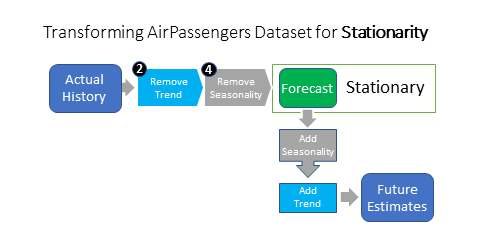


Let’s start by working on the **trend** piece.    



---



####1. **Trend Analysis**    

The first step is to reduce the trend using some transformation, as we can see here that there is a strong positive trend. These transformation can be `log`, `sq-rt`, `cube root`, etc . Basically it penalizes larger values more than the smaller values. In this case we will use the logarithmic transformation.    



Applying a `log()` function to dampen large values.    

In [ ]:
ts_log = np.log(ts)
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.show()

There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:    
    
a. **Smoothing** - using rolling/moving average    
b. **Aggression** - by taking the mean for a certain time period (year/month)    
    
    
The example which follows in this notebook uses **Smoothing**.     




#####Smoothing the Series    


In **smoothing** we usually take the past few periods or instances (rolling estimates).  Two methods of smoothing are considered in this notebook:    
-   **Moving Average**    
-   **Exponentially Weighted Moving Average (EWM)**.    



######**<u>Moving Average</u>**     

First take n consecutive values (depending on the frequency if it is 1 year of monthly data, then take 12 values) and sum the values for that range of period then divide by the number of periods in the range. Pandas has a function for rolling estimates.    


#####Applying a Moving Average    

Deriving a 12-month moving average of the data.     

*note that any moving average of `n` periods will result in the creation of `null` values for the first `n-1` periods.*    


In [ ]:
moving_avg = pd.Series(ts_log).rolling(12).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

Now subtract the rolling mean from the original series to calculate the period change in the moving average.    

In [15]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(13)
plt.show()

Drop the `null` or `NaN` values which resulted from calculating `n` number of periods in the moving average.    


In [16]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()
plt.show()

The reason there are null values is because we take the average of first 12 so 11 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis. Now let’s parse it to the function to check for stationarity.    


Invoke the `test_stationarity()` function defined earlier, using the newly calculated differences in the moving average of log function (`ts_log_moving_avg_diff`)    


In [ ]:
plt.figure(figsize=(20,10))
test_stationarity(ts_log_moving_avg_diff)
plt.show()

We notice two things:    
* The rolling values are varying slightly but there is no specific trend.
* The test statistics is smaller than the 5 % critical values.     


That tells us that we are 95% confident that this series is stationary.    


In this example we can easily take a time period (12 months for a year), but there are situations where the time period range is more complex like stock price etc. So we use the exponentially weighted moving average (there are other weighted moving averages but for starters, lets use this). The previous values are assigned with a decay factor. Pandas again comes to the rescue with some awesome functions for it, like:

We can also use the  `.adf_test()` function we relied upon earlier to test for **stationarity**.     

In [ ]:
# perform ADF test to check for stationarity
adf_test(ts_log_moving_avg_diff)

Calculate the exponentially-weighted moving average using the `ewm()` method.

###### <u>**Exponentially weighted moving average**</u>

In [ ]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')
plt.show()

The parameter (halflife) is assumed to be 12, but that really depends on the characteristics of the data in the domain. Let’s check stationarity now.

Calculating the difference in the exponentially-weighted moving average from the log of the time series (`ts_log_ewma_diff`) and testing for stationarity.

In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
plt.figure(figsize=(20,10))
test_stationarity(ts_log_ewma_diff)
plt.show()

It is stationary because:    

* Rolling values have less variations in **mean** and **standard deviation** in magnitude.    
* the **Test Statistic** is smaller than 1% of the critical value. So we can say we are almost 99% confident that this is stationary.    



We can also use the  `.adf_test()` function we relied upon earlier to test for **stationarity**.     

In [ ]:
# perform ADF test to check for stationarity
adf_test(ts_log_ewma_diff)



---



####3. **Analyzing and Treating Seasonality**      

**(Along with the Trend)**     


Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:    
* **Differencing** - by taking difference using time lag    
* **Decomposition** -  model both trend and seasonality, then remove them
    



#####<u>**Differencing**</u>        
     
First take the difference of the value at a particular time with that of the previous time.      
     

Calculating a difference based on a shift in period. 

In [ ]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.show()

*Remember that by shifting one period we create one observation with a null (`NaN`) value.*    

In [ ]:
ts_log_diff.isnull().sum()

Drop missing (`NaN`) values and parse it using our stationary testing function.    

In [ ]:
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(20,10))
test_stationarity(ts_log_diff)
plt.show()

It is stationary because:    
* the **mean** and **std variations** have small variations with time.    
* **Test Statistic** is less than 10% of the critical values, so we can be 90 % confident that this is stationary.    

We can also use the  `.adf_test()` function we relied upon earlier to test for **stationarity**.     

In [ ]:
# perform ADF test to check for stationarity
adf_test(ts_log_diff)



---



#####**<u>Decomposing</u>**    

Here we model both the trend and the seasonality, then the remaining part of the time series is returned. Pandas has a  function for it. Let’s check it out.

*Additional housekeeping to import `seasonal_decompose` for analysis and treatment of seasonality.*    
 

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

Analyze a decomposition of the `trend`, it's `seasonal` component and the `residual` value.    


In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

Processing the seasonality residual values and invoking the `test_stationarity` function defined earlier using residuals (`ts_log_decompose`) as an argument.    


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.figure(figsize=(20,10))
test_stationarity(ts_log_decompose)



This is stationary because:    
* **Test Statistic** is lower than 1% critical values.    
* the **mean** and **std variations** have small variations with time.   



We can also use the `.adf_test()` function we relied upon earlier to test for **stationarity**.     

In [ ]:
# perform ADF test to check for stationarity
adf_test(ts_log_decompose)



---



####5. **Forecasting a Time Series (AR-I-MA)** 

#####**<u>ACF & PACF</u>**      
    

**About ACF and PACF**    


*from [Significance of ACF and PACF in Time Series Analysis, TowardDataScience](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8)*    



**ACF** is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.    


**PACF** is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.    



Additional housekeeping to import plot methods `plot_acf()` and `plot_pacf()`.   

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Plot of ACF, PACF for the difference in log of time series (`ts_log_diff`).      

In [ ]:
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)
plt.figure(figsize=(20,10))
plt.show()

Housekeeping to import `ARIMA` for Auto-Regressive in Moving Average analysis.    


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

In [ ]:
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

plt.figure(figsize=(20,10))
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

######**Auto-Regressive Model**   


**Auto regressive (AR) process** - a time series is said to be AR when present value of the time series can be obtained using previous values of the same time series *i.e.* the present value is weighted average of its past values. Stock prices and global temperature rise can be thought of as an AR processes.    




In [ ]:
#AR model
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))
plt.show()

######**Moving Average Model**    

**Moving average (MA) process** -  a process where the present value of series is defined as a linear combination of past errors. We assume the errors to be independently distributed with the normal distribution.     


In [ ]:
#MA model
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))
plt.show()

######**Auto-Regressive in Moving Average Model**    


In [ ]:
#ARIMA model
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))
plt.show()

######**Calculated Targets (Predictions)**    


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))
plt.show()

######**Forecasting with 95% Confidence**    


In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
fig = results_ARIMA.plot_predict(start='1959-01-01', end='1964-01-01',ax=ax)
legend = ax.legend(loc='upper left')
plt.show()

######<u>Forecast for next 12 months</u>    
    

Use ARIMA to forecast 12 periods and raise values using `np.exp()` then populate a dataframe (`prediction_df`) with those forecasted values.    


In [ ]:
results = results_ARIMA.forecast(steps = 12)
converted_results = [(np.exp(x)) for x in [i for i in results]]
prediction_df = pd.DataFrame(converted_results)
prediction_df



---



##Reference: Step-by-Step ARIMA      
    
[Time Series Forecasting using ARIMA Models: A Step-by-Step Guide](https://medium.com/@data-overload/time-series-forecasting-using-arima-models-a-step-by-step-guide-90940d61337c) by DataOverload in Medium.com 



---

